In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.dates import DateFormatter

graph_colors = plt.cm.get_cmap("tab10").colors
formatter_week = DateFormatter("%b %d")

In [2]:
def ratio_day(serie):
    l = [None]
    for i in range(1, len(serie)):
        l.append(round((serie[i] / serie[i - 1]), 3))

    return l

In [3]:
def substract(serie):
    l = [None]
    for i in range(1, len(serie)):
        l.append(round((serie[i] - serie[i - 1]), 3))

    return l

In [4]:
markers = ["o", "*", "v", "s", "p", "h"]
styles = ["-", "-.", "--", ":", "-", "-."]

In [5]:
path_data = os.path.join("csse_covid_19_data", "csse_covid_19_time_series")
file_data = "time_series_covid19_confirmed_global.csv"

In [6]:
data = (
    pd.read_csv(
        os.path.join(path_data, file_data),
        index_col=["Country/Region", "Province/State", "Lat", "Long"],
    )
    .sort_index()
    .T
)
data.index = pd.to_datetime(data.index)
data = data.round(3)
data.head()

Country/Region Afghanistan     Albania     Algeria     Andorra      Angola  \
Province/State         NaN         NaN         NaN         NaN         NaN   
Lat              33.000000   41.153300   28.033900   42.506300  -11.202700   
Long            65.000000   20.168300   1.659600    1.521800    17.873900    
2020-01-22               0           0           0           0           0   
2020-01-23               0           0           0           0           0   
2020-01-24               0           0           0           0           0   
2020-01-25               0           0           0           0           0   
2020-01-26               0           0           0           0           0   

Country/Region Antigua and Barbuda   Argentina     Armenia  \
Province/State                 NaN         NaN         NaN   
Lat                      17.060800  -38.416100   40.069100   
Long                   -61.796400  -63.616700   45.038200    
2020-01-22                       0           0           0   
2020-01-23                       0           0           0   
2020-01-24                       0           0           0   
2020-01-25                       0           0           0   
2020-01-26                       0           0           0   

Country/Region                    Australia                  ...  \
Province/State Australian Capital Territory New South Wales  ...   
Lat                              -35.473500      -33.868800  ...   
Long                             149.012400      151.209300  ...   
2020-01-22                                0               0  ...   
2020-01-23                                0               0  ...   
2020-01-24                                0               0  ...   
2020-01-25                                0               0  ...   
2020-01-26                                0               3  ...   

Country/Region United Kingdom     Uruguay  Uzbekistan   Venezuela     Vietnam  \
Province/State            NaN         NaN         NaN         NaN         NaN   
Lat                 55.378100  -32.522800   41.377500   6.423800    16.000000   
Long              -3.436000   -55.765800   64.585300  -66.589700   108.000000   
2020-01-22                  0           0           0           0           0   
2020-01-23                  0           0           0           0           2   
2020-01-24                  0           0           0           0           2   
2020-01-25                  0           0           0           0           2   
2020-01-26                  0           0           0           0           2   

Country/Region West Bank and Gaza Western Sahara       Yemen      Zambia  \
Province/State                NaN            NaN         NaN         NaN   
Lat                     31.952200      24.215500   15.552727  -15.416700   
Long                   35.233200     -12.885800   48.516388   28.283300    
2020-01-22                      0              0           0           0   
2020-01-23                      0              0           0           0   
2020-01-24                      0              0           0           0   
2020-01-25                      0              0           0           0   
2020-01-26                      0              0           0           0   

Country/Region    Zimbabwe  
Province/State         NaN  
Lat             -20.000000  
Long            30.000000   
2020-01-22               0  
2020-01-23               0  
2020-01-24               0  
2020-01-25               0  
2020-01-26               0  

[5 rows x 266 columns]

## Total

In [7]:
confirmed = pd.DataFrame(index=data.index)

In [8]:
confirmed["Total"] = data.sum(axis=1)

In [9]:
confirmed["ratio_tot"] = ratio_day(confirmed["Total"])

In [10]:
confirmed["ratio_diff_tot"] = substract(confirmed["ratio_tot"])

## W/o China

In [11]:
confirmed["Total_wo_China"] = confirmed["Total"] - data.loc[:, "China"].sum(axis=1)

In [12]:
confirmed["ratio_wo_China"] = ratio_day(confirmed["Total_wo_China"])

In [13]:
confirmed["ratio_diff_wo_China"] = substract(confirmed["ratio_wo_China"])

## Canada

In [14]:
confirmed["Total_Can"] = data.loc[:, "Canada"].sum(axis=1)

In [15]:
confirmed["ratio_Can"] = ratio_day(confirmed["Total_Can"])

/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.
/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in long_scalars
  after removing the cwd from sys.path.


In [16]:
confirmed["ratio_diff_Can"] = substract(confirmed["ratio_Can"])

## Quebec

In [17]:
confirmed["Total_Qc"] = data.loc[:, ("Canada", "Quebec")].sum(axis=1)

/Users/leroylouis/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1418: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


In [18]:
confirmed["ratio_Qc"] = ratio_day(confirmed["Total_Qc"])

/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.
/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in long_scalars
  after removing the cwd from sys.path.


In [19]:
confirmed["ratio_diff_Qc"] = substract(confirmed["ratio_Qc"])

## France (métropole)

In [20]:
confirmed["Total_Fra"] = data.loc[:, "France"].iloc[:, -1]
# data.loc[:, ("France", "France")].sum(axis=1)

In [21]:
confirmed["ratio_Fra"] = ratio_day(confirmed["Total_Fra"])

/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.
/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in long_scalars
  after removing the cwd from sys.path.


In [22]:
confirmed["ratio_diff_Fra"] = substract(confirmed["ratio_Fra"])

## USA

In [23]:
confirmed["Total_US"] = data.loc[:, "US"].sum(axis=1)

In [24]:
confirmed["ratio_US"] = ratio_day(confirmed["Total_US"])

In [25]:
confirmed["ratio_diff_US"] = substract(confirmed["ratio_US"])

## Tables

In [26]:
confirmed[["Total", "Total_wo_China", "Total_Can", "Total_Qc", "Total_Fra", "Total_US"]].tail()

,Total,Total_wo_China,Total_Can,Total_Qc,Total_Fra,Total_US
2020-04-29,3172287,3088343,52865,26610,165093,1039909
2020-04-30,3256853,3172897,54457,27550,165764,1069424
2020-05-01,3343777,3259818,56343,28656,165764,1103461
2020-05-02,3427343,3343384,57926,29664,166976,1132539
2020-05-03,3506729,3422765,60504,31873,167272,1158040


In [27]:
confirmed[["ratio_tot", "ratio_wo_China", "ratio_Can", "ratio_Qc", "ratio_Fra", "ratio_US"]].tail()

,ratio_tot,ratio_wo_China,ratio_Can,ratio_Qc,ratio_Fra,ratio_US
2020-04-29,1.024,1.025,1.034,1.033,0.985,1.027
2020-04-30,1.027,1.027,1.030,1.035,1.004,1.028
2020-05-01,1.027,1.027,1.035,1.040,1.000,1.032
2020-05-02,1.025,1.026,1.028,1.035,1.007,1.026
2020-05-03,1.023,1.024,1.045,1.074,1.002,1.023


In [28]:
confirmed[
    [
        "ratio_diff_tot",
        "ratio_diff_wo_China",
        "ratio_diff_Can",
        "ratio_diff_Qc",
        "ratio_diff_Fra",
        "ratio_diff_US",
    ]
].tail()

,ratio_diff_tot,ratio_diff_wo_China,ratio_diff_Can,ratio_diff_Qc,ratio_diff_Fra,ratio_diff_US
2020-04-29,0.000,0.000,0.003,0.002,-0.033,0.002
2020-04-30,0.003,0.002,-0.004,0.002,0.019,0.001
2020-05-01,0.000,0.000,0.005,0.005,-0.004,0.004
2020-05-02,-0.002,-0.001,-0.007,-0.005,0.007,-0.006
2020-05-03,-0.002,-0.002,0.017,0.039,-0.005,-0.003


## Plots

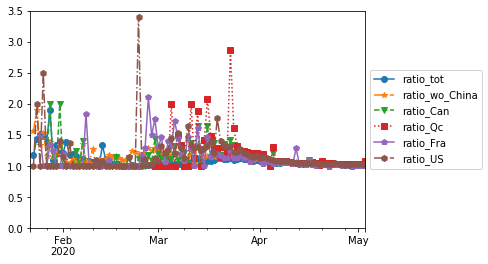

In [29]:
# Ratio
ax_ratio = confirmed[
    ["ratio_tot", "ratio_wo_China", "ratio_Can", "ratio_Qc", "ratio_Fra", "ratio_US"]
].plot()
for i, line in enumerate(ax_ratio.get_lines()):
    line.set_marker(markers[i])
    line.set_linestyle(styles[i])
ax_ratio.legend(bbox_to_anchor=(1, 0.75))
ax_ratio.set_ylim([0, 3.5]);

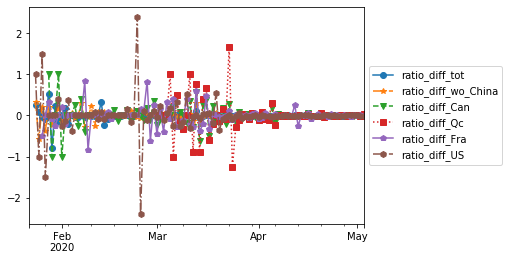

In [30]:
# Ratio diff
ax_ratio = confirmed[
    [
        "ratio_diff_tot",
        "ratio_diff_wo_China",
        "ratio_diff_Can",
        "ratio_diff_Qc",
        "ratio_diff_Fra",
        "ratio_diff_US",
    ]
].plot()
for i, line in enumerate(ax_ratio.get_lines()):
    line.set_marker(markers[i])
    line.set_linestyle(styles[i])
ax_ratio.legend(bbox_to_anchor=(1, 0.75))

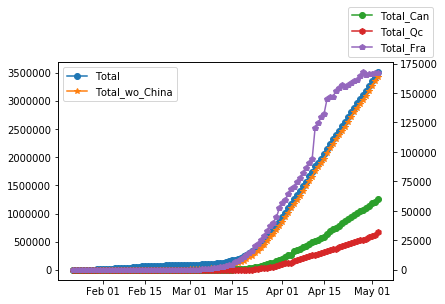

In [31]:
# Cases
fig, ax_total = plt.subplots(1,1)

ax_total.plot(confirmed[
    ["Total", "Total_wo_China"]
])
ax2 = ax_total.twinx()
ax2.plot(confirmed[
    ["Total_Can", "Total_Qc", "Total_Fra"]
])
for i, line in enumerate(ax_total.get_lines()):
    line.set_marker(markers[i])
for j, line in enumerate(ax2.get_lines()):
    line.set_marker(markers[-j])
    line.set_color(graph_colors[j+2])
    
ax_total.legend(["Total", "Total_wo_China"])
ax2.legend(["Total_Can", "Total_Qc", "Total_Fra"], bbox_to_anchor=(0.85, 1));

plt.gcf().axes[0].xaxis.set_major_formatter(formatter_week)